# BIODATA

> **Akhmad Ramadani**

> TI-3B 

> 2041720002


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

## Convolution Function

In [2]:
def convolution2dUsingNP(image, kernel, stride = 1, padding = 0):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  image_result = np.zeros((output_height, output_width)).astype(np.uint8)

  for y in range(0, output_height):
    for x in range(0, output_width):
      image_result[y][x] = np.clip(np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel), 0, 255)

  return image_result


In [3]:
def convolution2d(image, kernel, stride = 1, padding = 0):
  # padding image with zeros
  padded_height, padded_width = image.shape
  padded_image = [[0] * (padded_width + padding*2) for _ in range(padded_height + padding*2)]
  for i in range(padding, padded_height + padding):
    for j in range(padding, padded_width + padding):
      padded_image[i][j] = image[i-padding][j-padding]
  padded_image = np.array(padded_image)

  # calculate output shape
  kernel_height, kernel_width = kernel.shape
  output_height = (padded_height - kernel_height + 2*padding) // stride + 1
  output_width = (padded_width - kernel_width + 2*padding) // stride + 1

  # apply convolution
  output = []
  for i in range(0, output_height):
    row = []
    for j in range(0, output_width):
      # get corresponding slice of image
      y_start = i*stride
      y_end = y_start + kernel_height
      x_start = j*stride
      x_end = x_start + kernel_width
      image_slice = padded_image[y_start:y_end, x_start:x_end]
      # calculate element-wise multiplication and sum
      elem_wise_mult = [[image_slice[ii][jj] * kernel[ii][jj] for jj in range(kernel_width)] for ii in range(kernel_height)]
      elem_wise_sum = np.clip(sum([sum(row) for row in elem_wise_mult]), 0, 255)
      row.append(elem_wise_sum)
    output.append(row)

  return np.array(output)

## Initialize Real Image

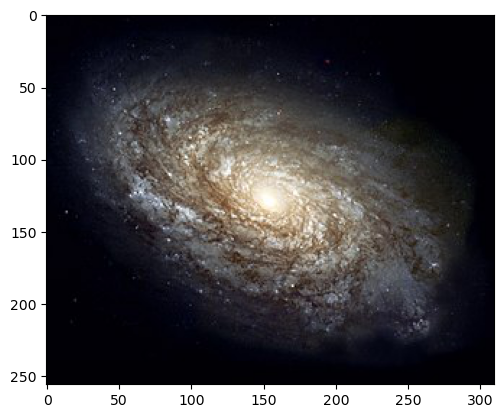

In [4]:
img1 = cv.imread('Images/galaxy.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
# show image
plt.imshow(img1)

In [5]:
img1_R = img1[:,:,0]
img1_G = img1[:,:,1]
img1_B = img1[:,:,2]
img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)

## Median Filter

In [6]:
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = np.zeros(data.shape)
    for i in range(indexer, data.shape[0] - indexer):
        for j in range(indexer, data.shape[1] - indexer):
            for k in range(-indexer, indexer + 1):
                for l in range(-indexer, indexer + 1):
                    temp.append(data[i + k, j + l])
            temp.sort()
            data_final[i, j] = np.clip(temp[len(temp) // 2], 0, 255)
            temp = []
    return data_final

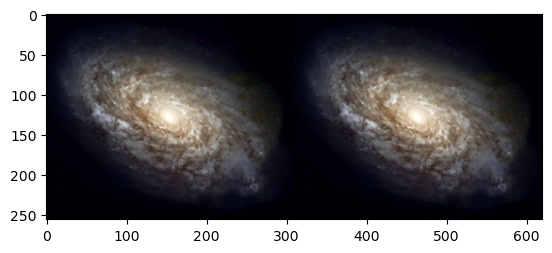

In [7]:
# filter image using median filter
filtered_img_R = median_filter(img1_R, 3)
filtered_img_G = median_filter(img1_G, 3)
filtered_img_B = median_filter(img1_B, 3)

# reassemble image
filtered_img = np.zeros(img1.shape)
filtered_img[:,:,0] = filtered_img_R
filtered_img[:,:,1] = filtered_img_G
filtered_img[:,:,2] = filtered_img_B
filtered_img = filtered_img.astype(np.uint8)

# median filter using opencv
filtered_img_cv = cv.medianBlur(img1, 3)

# concatenate images
img_concat = np.concatenate(( filtered_img, filtered_img_cv), axis=1)
# show image
plt.imshow(img_concat)

## Mode Filter

In [8]:
def mode_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = np.zeros(data.shape)
    for i in range(indexer, data.shape[0] - indexer):
        for j in range(indexer, data.shape[1] - indexer):
            for k in range(-indexer, indexer + 1):
                for l in range(-indexer, indexer + 1):
                    temp.append(data[i + k, j + l])
            data_final[i, j] = np.clip(max(set(temp), key = temp.count), 0, 255)
            temp = []
    return data_final



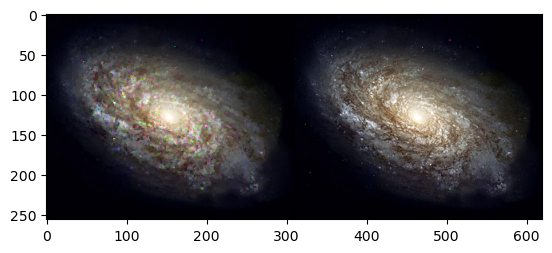

In [9]:
# filter image using mode filter
mode_filtered_img_R = mode_filter(img1_R, 3)
mode_filtered_img_G = mode_filter(img1_G, 3)
mode_filtered_img_B = mode_filter(img1_B, 3)

# reassemble image
mode_filtered_img = np.zeros(img1.shape)
mode_filtered_img[:,:,0] = mode_filtered_img_R
mode_filtered_img[:,:,1] = mode_filtered_img_G
mode_filtered_img[:,:,2] = mode_filtered_img_B
mode_filtered_img = mode_filtered_img.astype(np.uint8)

# mode filter using PIL
mode_filtered_img_pil = Image.fromarray(img1)
mode_filtered_img_pil = mode_filtered_img_pil.filter(ImageFilter.ModeFilter(3))

# concatenate images
img_concat = np.concatenate(( mode_filtered_img, mode_filtered_img_pil), axis=1)
# show image
plt.imshow(img_concat)


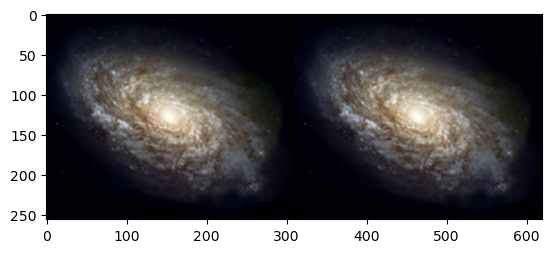

In [10]:
averaging_kernel = np.array(
    [
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
    ]
)

averaging_kernel_img_R = convolution2dUsingNP(img1_R, averaging_kernel, padding=1)
averaging_kernel_img_G = convolution2dUsingNP(img1_G, averaging_kernel, padding=1)
averaging_kernel_img_B = convolution2dUsingNP(img1_B, averaging_kernel, padding=1)
# reassemble image
averaging_kernel_img = np.zeros(img1.shape)
averaging_kernel_img[:,:,0] = averaging_kernel_img_R
averaging_kernel_img[:,:,1] = averaging_kernel_img_G
averaging_kernel_img[:,:,2] = averaging_kernel_img_B
averaging_kernel_img = averaging_kernel_img.astype(np.uint8)

# averaging filter using PIL
averaging_kernel_img_pil = Image.fromarray(img1)
averaging_kernel_img_pil = averaging_kernel_img_pil.filter(ImageFilter.Kernel((3,3), averaging_kernel.flatten(), 1, 0))

# concatenate images
img_concat = np.concatenate(( averaging_kernel_img, averaging_kernel_img_pil), axis=1)

# show image
plt.imshow(img_concat)

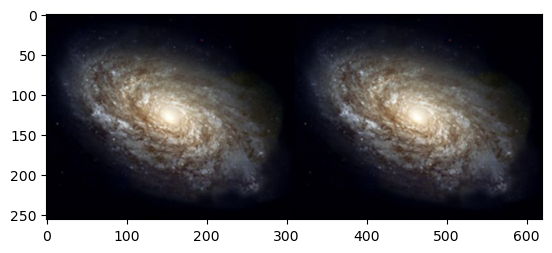

In [11]:
low_pass_kernel = np.array(
    [
        [1/12, 1/12, 1/12],
        [1/12, 4/12, 1/12],
        [1/12, 1/12, 1/12],
    ]
)

low_pass_img_R = convolution2d(img1_R, low_pass_kernel, padding=1)
low_pass_img_G = convolution2d(img1_G, low_pass_kernel, padding=1)
low_pass_img_B = convolution2d(img1_B, low_pass_kernel, padding=1)
# reassemble image
low_pass_img = np.zeros(img1.shape)
low_pass_img[:,:,0] = low_pass_img_R
low_pass_img[:,:,1] = low_pass_img_G
low_pass_img[:,:,2] = low_pass_img_B
low_pass_img = low_pass_img.astype(np.uint8)

# low pass filter using PIL
low_pass_img_pil = Image.fromarray(img1)
low_pass_img_pil = low_pass_img_pil.filter(ImageFilter.Kernel((3,3), low_pass_kernel.flatten(), 1, 0))

# concatenate images
img_concat = np.concatenate(( low_pass_img, low_pass_img_pil), axis=1)

# show image
plt.imshow(img_concat)

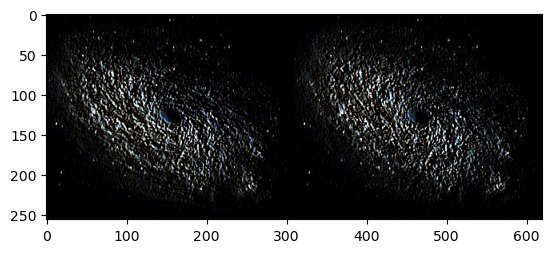

In [12]:
high_pass_kernel = np.array(
    [
        [-1, 0, 1],
        [-1, 0, 3],
        [-3, 0, 1],
    ]
)

high_pass_img_R = convolution2d(img1_R, high_pass_kernel, padding=1)
high_pass_img_G = convolution2d(img1_G, high_pass_kernel, padding=1)
high_pass_img_B = convolution2d(img1_B, high_pass_kernel, padding=1)
# reassemble image
high_pass_img = np.zeros(img1.shape)
high_pass_img[:,:,0] = high_pass_img_R
high_pass_img[:,:,1] = high_pass_img_G
high_pass_img[:,:,2] = high_pass_img_B
high_pass_img = high_pass_img.astype(np.uint8)

# high pass filter using PIL
high_pass_img_pil = Image.fromarray(img1)
high_pass_img_pil = high_pass_img_pil.filter(ImageFilter.Kernel((3,3), high_pass_kernel.flatten(), 1, 0))

# concatenate images
img_concat = np.concatenate(( high_pass_img, high_pass_img_pil), axis=1)

plt.imshow(img_concat)

In [2]:
img_morphology = cv.imread('Images/j.png')
img_morphology = cv.cvtColor(img_morphology, cv.COLOR_BGR2GRAY)
# plt.imshow(img_morphology, cmap='gray')


In [3]:
# dilation function
def dilation(img, kernel, padding=0):
    # get image shape
    img_shape = img.shape
    # get kernel shape
    kernel_shape = kernel.shape
    # get padding size
    padding_size = padding
    # create output image
    output = np.zeros(img_shape)
    # pad image
    img = np.pad(img, padding_size, mode='constant', constant_values=0)
    # iterate over image
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # get max value
            max_value = 0
            for k in range(kernel_shape[0]):
                for l in range(kernel_shape[1]):
                    if kernel[k, l] == 1:
                        if img[i + k, j + l] > max_value:
                            max_value = img[i + k, j + l]
            output[i, j] = max_value
    return output

In [4]:
# erosion function
def erosion(img, kernel, padding=0):
    # get image shape
    img_shape = img.shape
    # get kernel shape
    kernel_shape = kernel.shape
    # get padding size
    padding_size = padding
    # create output image
    output = np.zeros(img_shape)
    # pad image
    img = np.pad(img, padding_size, mode='constant', constant_values=0)
    # iterate over image
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # get min value
            min_value = 255
            for k in range(kernel_shape[0]):
                for l in range(kernel_shape[1]):
                    if kernel[k, l] == 1:
                        if img[i + k, j + l] < min_value:
                            min_value = img[i + k, j + l]
            output[i, j] = min_value
    return output

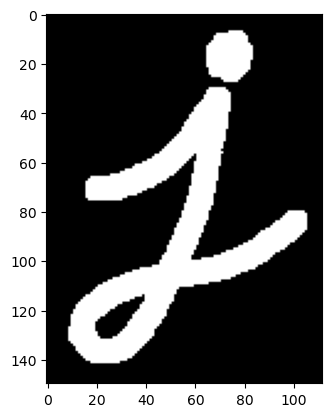

In [8]:
cross_kernel = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
    ], np.uint8
)
img_morph = img_morphology

dilation_img = dilation(img_morph, cross_kernel, padding=1)

plt.imshow(dilation_img, cmap='gray')

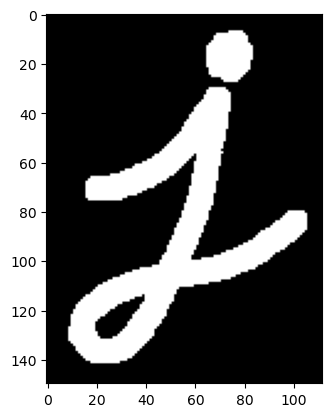

In [10]:
# dilation using opencv
dilation_img_cv = cv.dilate(img_morph, kernel=cross_kernel, iterations=1)

#show image
plt.imshow(dilation_img_cv, cmap='gray')


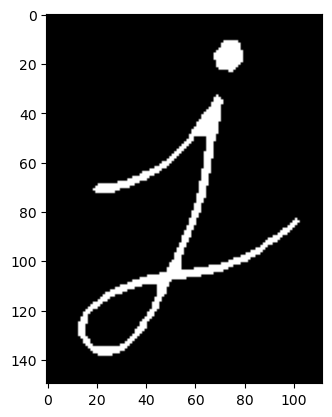

In [11]:
structuring_element = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]
    ], np.uint8
)

erosion_img = erosion(img_morph, structuring_element, padding=2)
# erosion_img = erosion_img.astype(np.uint8)

plt.imshow(erosion_img, cmap='gray')

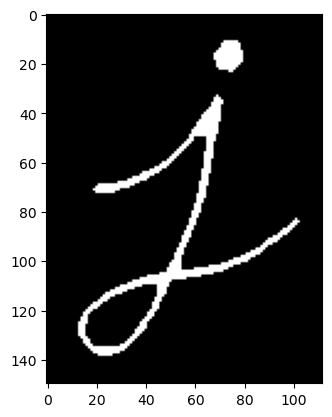

In [12]:
# erosion using opencv
erosion_img_cv = cv.erode(img_morph, kernel=structuring_element, iterations=1)

#show image
plt.imshow(erosion_img_cv, cmap='gray')